## Extract tracer transports and save into files


This notebook extracts the tracer trabnsport through several cross sections along the shelf, across the shelf and vertically, from canyon to shelf. See plot below. Transport is divided in advective and diffusive by the model and stored in files called Flux01Glob.nc (01 is the tracer number for tracer 1).

Advective tracer transport $\Phi_{Tadv}=C\vec{u}\cdot\vec{a}$ 

Diffusive tracer transport $\Phi_{Tdiff}$, includes diffusion due to advection scheme)

| variable  | dims | units | description |
|:---------:|:---------:|:---------:|:---------:|
| UTRAC01   |   (T, Zmd000090, Y, Xp1) | Mol/L.m/s | Zonal Mass-Weighted Transp of Tr1 |
| VTRAC01   |   (T, Zmd000090, Yp1, X) | Mol/L.m/s | Meridional Mass-Weighted Transp of Tr1 |
| WTRAC01   |   (T, Zmd000090, Y, X)   | Mol/L.m/s | Vertical Mass-Weighted Transp of Tr1 |  
| ADVrTr01  |   (T, Zld000104, Y, X)   | Mol/L.m^3/s| Zonal Advective Flux of Tr1 |
| ADVxTr01  |   (T, Zmd000090, Y, Xp1) | Mol/L.m^3/s| Meridional Advective Flux of Tr1 |
| ADVyTr01  |   (T, Zmd000090, Yp1, X) | Mol/L.m^3/s| Vertical Advective Flux of Tr1 |
| DFrETr01  |   (T, Zld000104, Y, X)   | Mol/L.m^3/s| Vertical Diffusive Flux of Tr1 (Explicit part) |
| DFrITr01  |   (T, Zld000104, Y, X)   | Mol/L.m^3/s| Vertical Diffusive Flux of Tr1 (Implicit part) |
| DFxETr01  |   (T, Zmd000090, Y, Xp1) | Mol/L.m^3/s| Zonal Diffusive Flux of Tr1 |
| DFyETr01  |   (T, Zmd000090, Yp1, X) | Mol/L.m^3/s| Meridional Diffusive Flux of Tr1 |


* run##water_CS_transports.nc - cross-shelf and vertical transports

There is one of each files for every run.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
# Define slices and positions of cross sections 
CS1_x_slice = slice(0, 60)
CS2_x_slice = slice(60, 120)
CS3_x_slice = slice(120, 240)
CS4_x_slice = slice(240, 300)
CS5_x_slice = slice(300, 360)
CS6_x_slice = slice(360, 616)
CSCOAST_x_slice = slice(0, 616)

CS_y_coast = 358
CS_y_ind = 131
HD_y_ind = 240
SB_ind = 30
UP_x_ind = 120
DN_x_ind = 240

/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0,0.5,'depth [m]')

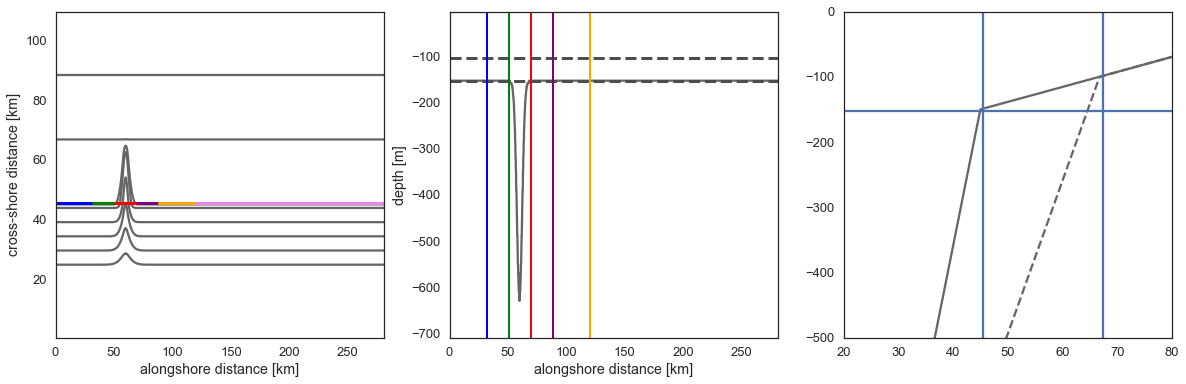

In [3]:
grid_file = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/gridGlob.nc'
grid = xr.open_dataset(grid_file)

sns.set_style(style='white')
sns.set_context('talk')
fig, ax = plt.subplots(1, 3, figsize=(20,6))

ax[0].contour(grid.X/1000,grid.Y/1000,grid.Depth,[50,100,150,200,400,600,800,1000], colors='0.4')

ax[0].plot(grid.XC[CS_y_ind,CS1_x_slice]/1000,grid.YC[CS_y_ind,CS1_x_slice]/1000, 'b-', linewidth=3)
ax[0].plot(grid.XC[CS_y_ind,CS2_x_slice]/1000,grid.YC[CS_y_ind,CS2_x_slice]/1000, 'g-', linewidth=3)
ax[0].plot(grid.XC[CS_y_ind,CS3_x_slice]/1000,grid.YC[CS_y_ind,CS3_x_slice]/1000, 'r-', linewidth=3)
ax[0].plot(grid.XC[CS_y_ind,CS4_x_slice]/1000,grid.YC[CS_y_ind,CS4_x_slice]/1000, '-',color='purple', linewidth=3)
ax[0].plot(grid.XC[CS_y_ind,CS5_x_slice]/1000,grid.YC[CS_y_ind,CS5_x_slice]/1000, '-', color='orange', linewidth=3)
ax[0].plot(grid.XC[CS_y_ind,CS6_x_slice]/1000,grid.YC[CS_y_ind,CS6_x_slice]/1000, '-', color='violet', linewidth=3)


ax[0].set_xlabel('alongshore distance [km]')
ax[0].set_ylabel('cross-shore distance [km]')

ax[1].contour(grid.XC[CS_y_ind,:]/1000,grid.RC[:80],grid.HFacC[:80,CS_y_ind,:],[0],colors='0.4')
ax[1].plot([grid.X[0]/1000,grid.X[615]/1000],[grid.RC[20],grid.RC[20]], '--', color='0.3', linewidth=3)
ax[1].plot([grid.X[0]/1000,grid.X[615]/1000],[grid.RC[SB_ind],grid.RC[SB_ind]], '--', color='0.3', linewidth=3)

ax[1].axvline(x=grid.X[60]/1000,color='b', linewidth=2)
ax[1].axvline(x=grid.X[120]/1000,color='g', linewidth=2)
ax[1].axvline(x=grid.X[240]/1000,color='r', linewidth=2)
ax[1].axvline(x=grid.X[300]/1000,color='purple', linewidth=2)
ax[1].axvline(x=grid.X[360]/1000,color='orange', linewidth=2)

ax[2].plot(grid.Y/1000,-grid.Depth[:,300],color='0.4')
ax[2].plot(grid.Y/1000,-grid.Depth[:,180],'--',color='0.4')
ax[2].axhline(grid.Z[SB_ind])
ax[2].axvline(grid.Y[CS_y_ind]/1000)
ax[2].axvline(grid.Y[HD_y_ind]/1000)
ax[2].set_xlim(20,80)
ax[2].set_ylim(-500,0)
ax[1].set_xlabel('alongshore distance [km]')
ax[1].set_ylabel('depth [m]')


In [4]:
def calc_trac_transport_CS(flux_component,hfac, x_slice, y_slice,T,zini=0,zfin=30):
    '''
    INPUT:
    flux_component: xarray, flux component perpendicular to cross section (e.g. unstagger_xarray(flux38.V,'Yp1'))
    x_slice : slice or index of cross-section in alongshore direction
    y_slice : slice or index of cross-section in cross-shore direction
    
    '''
    flux = (flux_component.isel(Zmd000104=slice(zini,zfin),Yp1=y_slice, X=x_slice)).data
    frac = 1#(hfac.isel(Z=slice(zini,zfin),Yp1=y_slice, X=x_slice)).data
    
    return (xr.DataArray(np.sum(np.sum(flux*frac,axis=1),axis=1), coords=T.coords))

 

def unstagger_xarray(qty, index):
    """Interpolate u, v, or w component values to values at grid cell centres.
    
    Named indexing requires that input arrays are XArray DataArrays.

    :arg qty: u, v, or w component values
    :type qty: :py:class:`xarray.DataArray`
    
    :arg index: index name along which to centre
        (generally one of 'gridX', 'gridY', or 'depth')
    :type index: str

    :returns qty: u, v, or w component values at grid cell centres
    :rtype: :py:class:`xarray.DataArray`
    """
    
    qty = (qty + qty.shift(**{index: 1})) / 2
    
    return qty



In [5]:
#set up paths to grid files
grid_Can_file = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/gridGlob.nc'
grid_NoC_file = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/02_Ast03_No_Cny/gridGlob.nc'


In [6]:
dir_name = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/'
noc_dir_name = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/02_Ast03_No_Cny/'

### Save tracer transport

In [7]:
grid = xr.open_dataset(grid_Can_file)
gridNoC = xr.open_dataset(grid_NoC_file)

In [8]:
keys = ['ADVyTr01','ADVyTr02','ADVyTr03','ADVyTr04','ADVyTr05','ADVyTr06','ADVyTr07','ADVyTr08','ADVyTr09','ADVyTr10']
keys_z = ['ADVrTr01','ADVrTr02','ADVrTr03','ADVrTr04','ADVrTr05','ADVrTr06','ADVrTr07','ADVrTr08','ADVrTr09','ADVrTr10']
tracers = ['TR01','TR02','TR03','TR04','TR05','TR06','TR07','TR08','TR09','TR10']
units = ['(muM)m3/s','PSU','(umol/kg)m3/s','(muM)m3/s','(muM)m3/s','muM)m3/s','(nM)m3/s','(nM)m3/s','(umol/kg)m3/s','(umol/kg)m3/s']

for tr, key, key_z, unit in zip(tracers, keys, keys_z, units):
    
    filename=('%s/Flux%sGlob.nc' %(dir_name,tr))
    flux = xr.open_dataset(filename)
    tracer = flux[key]
    
    advCS1_flux = calc_trac_transport_CS(tracer, grid.HFacS, CS1_x_slice, 
                                         CS_y_ind, flux.iter, zini=0, zfin=SB_ind+1)
    advCS2_flux = calc_trac_transport_CS(tracer, grid.HFacS, CS2_x_slice, 
                                         CS_y_ind, flux.iter, zini=0, zfin=SB_ind+1)
    advCS3_flux = calc_trac_transport_CS(tracer, grid.HFacS, CS3_x_slice, 
                                         CS_y_ind, flux.iter, zini=0, zfin=SB_ind+1)
    advCS3b_flux = calc_trac_transport_CS(tracer, grid.HFacS,CS3_x_slice,
                                          CS_y_ind, flux.iter,zini=SB_ind,zfin=104)
    advCS4_flux = calc_trac_transport_CS(tracer, grid.HFacS, CS4_x_slice, 
                                         CS_y_ind, flux.iter, zini=0, zfin=SB_ind+1)
    advCS5_flux = calc_trac_transport_CS(tracer, grid.HFacS, CS5_x_slice, 
                                         CS_y_ind, flux.iter, zini=0, zfin=SB_ind+1)
    advCS6_flux = calc_trac_transport_CS(tracer, grid.HFacS, CS6_x_slice, 
                                         CS_y_ind, flux.iter, zini=0, zfin=SB_ind+1)

    
    vel_vert = (flux[key_z].isel(Zld000104=SB_ind,Y=slice(CS_y_ind,HD_y_ind),
                                 X=slice(UP_x_ind,DN_x_ind)))
    advVert_flux = (vel_vert).sum(dim='Y').sum(dim='X')
    
    
    advVert_flux.name = 'Vert_adv_trans_sb'
    advVert_flux.attrs['units'] = unit
    advCS1_flux.name = 'CS1_adv_trans'
    advCS1_flux.attrs['units'] = unit
    advCS2_flux.name = 'CS2_adv_trans'
    advCS2_flux.attrs['units'] = unit
    advCS3_flux.name = 'CS3_adv_trans'
    advCS3_flux.attrs['units'] = unit
    advCS3b_flux.name = 'CS3b_adv_trans'
    advCS3b_flux.attrs['units'] = unit
    advCS4_flux.name = 'CS4_adv_trans'
    advCS4_flux.attrs['units'] = unit
    advCS5_flux.name = 'CS5_adv_trans'
    advCS5_flux.attrs['units'] = unit
    advCS6_flux.name = 'CS6_adv_trans'
    advCS6_flux.attrs['units'] = unit
   
    
    objectsCS = [advCS1_flux, advCS2_flux,advCS3_flux,advCS3b_flux,advCS4_flux,advCS5_flux,advCS6_flux,advVert_flux]
               
    
    DS_CS = xr.merge(objectsCS, compat='broadcast_equals', join='outer')
    DS_CS_path = ('%sadv%s_CS_transports.nc' %(dir_name,tr))
    DS_CS.to_netcdf(path=DS_CS_path, mode='w', engine='scipy')
    
    print(DS_CS_path)

/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/advTR01_CS_transports.nc
/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/advTR02_CS_transports.nc
/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/advTR03_CS_transports.nc
/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/advTR04_CS_transports.nc
/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/advTR05_CS_transports.nc
/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/advTR06_CS_transports.nc
/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/advTR07_CS_transports.nc
/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/advTR08_CS_transports.nc
/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/advTR09_CS_transports.nc
/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/advTR10_CS_transports.nc


In [ ]:
ii = 0
for tr, key, key_z, unit in zip(tracers, keys, keys_z, units):
    
    filename=('%s/Flux%sGlob.nc' %(noc_dir_name,tr))
    flux = xr.open_dataset(filename)
    tracer = flux[key]
    
    advCS1_flux = calc_trac_transport_CS(tracer, gridNoC.HFacS, CS1_x_slice, 
                                         CS_y_ind, flux.iter, zini=0, zfin=SB_ind+1)
    advCS2_flux = calc_trac_transport_CS(tracer, gridNoC.HFacS, CS2_x_slice, 
                                         CS_y_ind, flux.iter, zini=0, zfin=SB_ind+1)
    advCS3_flux = calc_trac_transport_CS(tracer, gridNoC.HFacS, CS3_x_slice, 
                                         CS_y_ind, flux.iter, zini=0, zfin=SB_ind+1)
    advCS3b_flux = calc_trac_transport_CS(tracer, gridNoC.HFacS,CS3_x_slice,
                                          CS_y_ind, flux.iter,zini=SB_ind,zfin=104)
    advCS4_flux = calc_trac_transport_CS(tracer, gridNoC.HFacS, CS4_x_slice, 
                                         CS_y_ind, flux.iter, zini=0, zfin=SB_ind+1)
    advCS5_flux = calc_trac_transport_CS(tracer, gridNoC.HFacS, CS5_x_slice, 
                                         CS_y_ind, flux.iter, zini=0, zfin=SB_ind+1)
    advCS6_flux = calc_trac_transport_CS(tracer, gridNoC.HFacS, CS6_x_slice, 
                                         CS_y_ind, flux.iter, zini=0, zfin=SB_ind+1)

    
    vel_vert = (flux[key_z].isel(Zld000104=SB_ind,
                                 Y=slice(CS_y_ind,HD_y_ind),
                                 X=slice(UP_x_ind,DN_x_ind)))
    advVert_flux = (vel_vert).sum(dim='Y').sum(dim='X')
    
    
    advVert_flux.name = 'Vert_adv_trans_sb'
    advVert_flux.attrs['units'] = unit
    advCS1_flux.name = 'CS1_adv_trans'
    advCS1_flux.attrs['units'] = unit
    advCS2_flux.name = 'CS2_adv_trans'
    advCS2_flux.attrs['units'] = unit
    advCS3_flux.name = 'CS3_adv_trans'
    advCS3_flux.attrs['units'] = unit
    advCS3b_flux.name = 'CS3b_adv_trans'
    advCS3b_flux.attrs['units'] = unit
    advCS4_flux.name = 'CS4_adv_trans'
    advCS4_flux.attrs['units'] = unit
    advCS5_flux.name = 'CS5_adv_trans'
    advCS5_flux.attrs['units'] = unit
    advCS6_flux.name = 'CS6_adv_trans'
    advCS6_flux.attrs['units'] = unit
   
    
    objectsCS = [advCS1_flux, advCS2_flux,advCS3_flux,advCS3b_flux,advCS4_flux,advCS5_flux,advCS6_flux,advVert_flux]
               
    
    DS_CS = xr.merge(objectsCS, compat='broadcast_equals', join='outer')
    DS_CS_path = ('%sadv%s_CS_transports.nc' %(noc_dir_name,tr))
    DS_CS.to_netcdf(path=DS_CS_path, mode='w', engine='scipy')
    
    print(DS_CS_path)

In [9]:
# Canyon, Diffusive 
keys = ['DFyETr01','DFyETr02','DFyETr03','DFyETr04','DFyETr05','DFyETr06','DFyETr07','DFyETr08','DFyETr09','DFyETr10']
keys_e = ['DFrETr01','DFrETr02','DFrETr03','DFrETr04','DFrETr05','DFrETr06','DFrETr07','DFrETr08','DFrETr09','DFrETr10']
keys_i = ['DFrITr01','DFrITr02','DFrITr03','DFrITr04','DFrITr05','DFrITr06','DFrITr07','DFrITr08','DFrITr09','DFrITr10']

tracers = ['TR01','TR02','TR03','TR04','TR05','TR06','TR07','TR08','TR09','TR10']
units = ['(muM)m3/s','PSU','(umol/kg)m3/s','(muM)m3/s','(muM)m3/s','(muM)m3/s','(nM)m3/s','(nM)m3/s','(umol/kg)m3/s','(umol/kg)m3/s']

for tr, key, key_e, key_i, unit in zip(tracers, keys, keys_e, keys_i, units):
    
    filename=('%s/Flux%sGlob.nc' %(dir_name,tr))
    flux = xr.open_dataset(filename)
    tracer = flux[key]
   
    difCS1_flux = calc_trac_transport_CS(flux[key], grid.HFacS, CS1_x_slice, 
                                         CS_y_ind,flux.iter,zini=0, zfin=SB_ind+1)
    difCS2_flux = calc_trac_transport_CS(flux[key], grid.HFacS, CS2_x_slice, 
                                         CS_y_ind,flux.iter,zini=0, zfin=SB_ind+1)
    difCS3_flux = calc_trac_transport_CS(flux[key], grid.HFacS, CS3_x_slice, 
                                         CS_y_ind,flux.iter,zini=0, zfin=SB_ind+1)
    difCS3b_flux = calc_trac_transport_CS(flux[key], grid.HFacS,
                                          CS3_x_slice, CS_y_ind,flux.iter,zini=SB_ind,zfin=104)
    difCS4_flux = calc_trac_transport_CS(flux[key], grid.HFacS, CS4_x_slice, 
                                         CS_y_ind,flux.iter,zini=0, zfin=SB_ind+1)
    difCS5_flux = calc_trac_transport_CS(flux[key], grid.HFacS, CS5_x_slice, 
                                         CS_y_ind,flux.iter,zini=0, zfin=SB_ind+1)
    difCS6_flux = calc_trac_transport_CS(flux[key], grid.HFacS, CS6_x_slice, 
                                         CS_y_ind,flux.iter,zini=0, zfin=SB_ind+1)

    
    flux_vert_E = (flux[key_e].isel(Zld000104=SB_ind,
                                    Y=slice(CS_y_ind,HD_y_ind),
                                    X=slice(UP_x_ind,DN_x_ind)))
    flux_vert_I = (flux[key_i].isel(Zld000104=SB_ind,
                                    Y=slice(CS_y_ind,HD_y_ind),
                                    X=slice(UP_x_ind,DN_x_ind)))
    difVert_flux = (flux_vert_E+flux_vert_I).sum(dim='Y').sum(dim='X')
    
    difVert_flux.name = 'Vert_dif_trans_sb'
    difVert_flux.attrs['units'] = unit

    difCS1_flux.name = 'CS1_dif_trans'
    difCS1_flux.attrs['units'] = unit
    difCS2_flux.name = 'CS2_dif_trans'
    difCS2_flux.attrs['units'] = unit
    difCS3_flux.name = 'CS3_dif_trans'
    difCS3_flux.attrs['units'] = unit
    difCS3b_flux.name = 'CS3b_dif_trans'
    difCS3b_flux.attrs['units'] = unit
    difCS4_flux.name = 'CS4_dif_trans'
    difCS4_flux.attrs['units'] = unit
    difCS5_flux.name = 'CS5_dif_trans'
    difCS5_flux.attrs['units'] = unit
    difCS6_flux.name = 'CS6_dif_trans'
    difCS6_flux.attrs['units'] = unit
   
    
    objectsCS = [difCS1_flux, difCS2_flux,difCS3_flux,difCS3b_flux,difCS4_flux,difCS5_flux,difCS6_flux,difVert_flux]
               
    
    DS_CS = xr.merge(objectsCS, compat='broadcast_equals', join='outer')
    DS_CS_path = ('%sdif%s_CS_transports.nc' %(dir_name,tr))
    DS_CS.to_netcdf(path=DS_CS_path, mode='w', engine='scipy')
    
    print(DS_CS_path)
    



/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/difTR01_CS_transports.nc
/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/difTR02_CS_transports.nc
/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/difTR03_CS_transports.nc
/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/difTR04_CS_transports.nc
/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/difTR05_CS_transports.nc
/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/difTR06_CS_transports.nc
/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/difTR07_CS_transports.nc
/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/difTR08_CS_transports.nc
/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/difTR09_CS_transports.nc
/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST_NONHYD/01_Ast03/difTR10_CS_transports.nc


In [ ]:
for tr, key, key_e, key_i, unit in zip(tracers, keys, keys_e, keys_i, units):
    
    filename=('%s/Flux%sGlob.nc' %(noc_dir_name,tr))
    flux = xr.open_dataset(filename)
    tracer = flux[key]
   
    difCS1_flux = calc_trac_transport_CS(flux[key], gridNoC.HFacS, CS1_x_slice, 
                                         CS_y_ind,flux.iter,zini=0, zfin=SB_ind+1)
    difCS2_flux = calc_trac_transport_CS(flux[key], gridNoC.HFacS, CS2_x_slice, 
                                         CS_y_ind,flux.iter,zini=0, zfin=SB_ind+1)
    difCS3_flux = calc_trac_transport_CS(flux[key], gridNoC.HFacS, CS3_x_slice, 
                                         CS_y_ind,flux.iter,zini=0, zfin=SB_ind+1)
    difCS3b_flux = calc_trac_transport_CS(flux[key], gridNoC.HFacS,
                                          CS3_x_slice, CS_y_ind,flux.iter,zini=SB_ind,zfin=104)
    difCS4_flux = calc_trac_transport_CS(flux[key], gridNoC.HFacS, CS4_x_slice, 
                                         CS_y_ind,flux.iter,zini=0, zfin=SB_ind+1)
    difCS5_flux = calc_trac_transport_CS(flux[key], gridNoC.HFacS, CS5_x_slice, 
                                         CS_y_ind,flux.iter,zini=0, zfin=SB_ind+1)
    difCS6_flux = calc_trac_transport_CS(flux[key], gridNoC.HFacS, CS6_x_slice, 
                                         CS_y_ind,flux.iter,zini=0, zfin=SB_ind+1)

    
    flux_vert_E = (flux[key_e].isel(Zld000104=SB_ind,
                                    Y=slice(CS_y_ind,HD_y_ind),
                                    X=slice(UP_x_ind,DN_x_ind)))
    flux_vert_I = (flux[key_i].isel(Zld000104=SB_ind,
                                    Y=slice(CS_y_ind,HD_y_ind),
                                    X=slice(UP_x_ind,DN_x_ind)))
    difVert_flux = (flux_vert_E+flux_vert_I).sum(dim='Y').sum(dim='X')
    
    difVert_flux.name = 'Vert_dif_trans_sb'
    difVert_flux.attrs['units'] = unit

    difCS1_flux.name = 'CS1_dif_trans'
    difCS1_flux.attrs['units'] = unit
    difCS2_flux.name = 'CS2_dif_trans'
    difCS2_flux.attrs['units'] = unit
    difCS3_flux.name = 'CS3_dif_trans'
    difCS3_flux.attrs['units'] = unit
    difCS3b_flux.name = 'CS3b_dif_trans'
    difCS3b_flux.attrs['units'] = unit
    difCS4_flux.name = 'CS4_dif_trans'
    difCS4_flux.attrs['units'] = unit
    difCS5_flux.name = 'CS5_dif_trans'
    difCS5_flux.attrs['units'] = unit
    difCS6_flux.name = 'CS6_dif_trans'
    difCS6_flux.attrs['units'] = unit
   
    
    objectsCS = [difCS1_flux, difCS2_flux,difCS3_flux,difCS3b_flux,difCS4_flux,difCS5_flux,difCS6_flux,difVert_flux]
               
    
    DS_CS = xr.merge(objectsCS, compat='broadcast_equals', join='outer')
    DS_CS_path = ('%sdif%s_CS_transports.nc' %(noc_dir_name,tr))
    DS_CS.to_netcdf(path=DS_CS_path, mode='w', engine='scipy')
    
    print(DS_CS_path)
   

